<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 

This practice task is desinged for impriving knowledge of ES models and getting aqcuainted with time series analysis (with python pandas).

The task should take about 3-5 hours to be completed.

<h1 align="center">1. Reading data (10%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
     - 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in shop)
     - 4) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in shop)
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot time series (for data sets with a lot of TS you need to plot integral sales of all items in shop)
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

In [1]:
# start with this code
import pandas as pd
import numpy as np
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualityMAPE
from utils import ExponentialSmoothing
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import math
%matplotlib inline

ts = pd.read_csv('monthly-wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)
# pd.date_range(ts.index[1]+timedelta(1), ts.index[1]+timedelta(19), freq="M")
ts.head()

,Real wage
Month,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47


In [2]:
ts.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Month', length=289, freq=None)

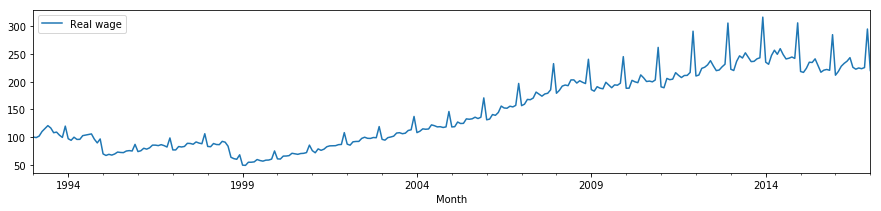

In [3]:
ts.plot(figsize=(15,3))

<h1 align="center">2. Apply Simple ES to data with trend and Seasonality (15%) </h1>
You need to apply SES (IES see seminar 2) model for TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

 * 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You can choose any loss function from seminar 2).
 * 2) Draw forecast with optimial value $\alpha$ for data from 09.1998 to 01.2017. Conclude whether SES can be used for this TS? If can not than explain why.
 * 3) Calculate accuracy of the forecast of TS in [02.2016, 01.2017].
 * 4) Aggregate original TS by Years (time step chould be 1 year). Repeat point 1)-2) for aggregated TS.

In [121]:
# put your code here
h = 1
ALPHA = [1.0, 0.99, 0.9, 0.85, 0.8, 0.75, 0.7, 0.4, 0.2, .15, 0.1, 0.01]
new_ts = ts.ix['1998-09-01':'2015-01-01']
start = new_ts.index[-1]+timedelta(1)
end = new_ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
FRC_TS = dict()
for alpha in ALPHA:
    frc_ts = pd.DataFrame(index = new_ts.index.append(rng), columns = new_ts.columns)
    
    for cntr in ts.columns:
        frc_ts[cntr] = ExponentialSmoothing(new_ts[cntr], h, {'alpha':alpha, 'AdaptationPeriod': 10})
        
    FRC_TS['ES alpha: %.2f' % alpha] = frc_ts
    
QualityStr = pd.DataFrame(index = new_ts.columns, columns = sorted(FRC_TS.keys()))

ix = range(len(new_ts.index))
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(new_ts, frc_ts)
QualityStr

# QualityStr[sorted(QualityStr.columns)].plot(figsize = (10,7), linewidth=3.0)

,ES alpha: 0.01,ES alpha: 0.10,ES alpha: 0.15,ES alpha: 0.20,ES alpha: 0.40,ES alpha: 0.70,ES alpha: 0.75,ES alpha: 0.80,ES alpha: 0.85,ES alpha: 0.90,ES alpha: 0.99,ES alpha: 1.00
Real wage,0.356458,0.079151,0.06385,0.057969,0.055166,0.059919,0.060643,0.06124,0.061754,0.062198,0.06335,0.063545


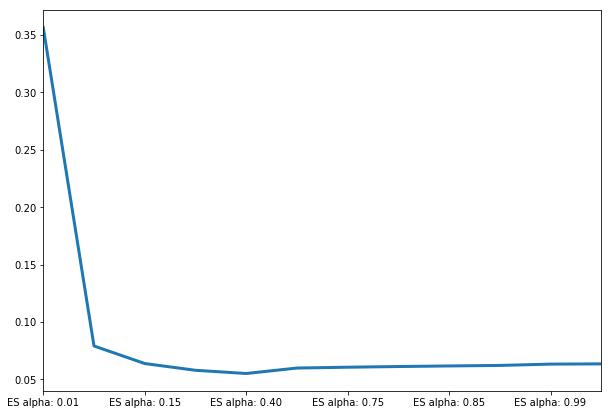

In [122]:
# 1) 
QualityStr[sorted(QualityStr.columns)].mean().plot(figsize = (10,7), linewidth=3.0)

* Optimal value of $\alpha$ is about $0.4$ 

In [123]:
best_alpha = 0.4

/home/mariam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


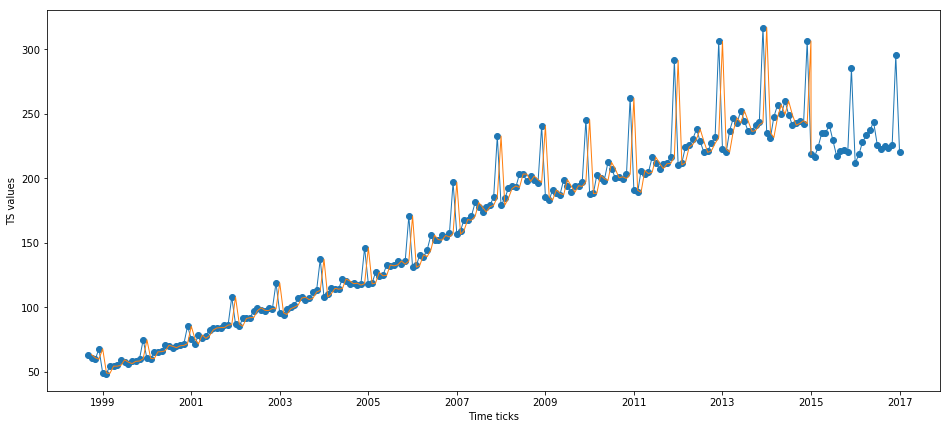

In [124]:
# 2) 
plt.figure(figsize=(16,7))
plt.plot(ts.ix['1998-09-01':'2017-01-01'], linewidth=1.0, marker='o')
plt.plot(frc_ts.ix['1998-09-01':'2017-01-01'], linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

In [125]:
# 3)
h = 1
alpha = best_alpha
new_ts = ts.ix['2016-02-01': '2017-01-01']
start = new_ts.index[-1]+timedelta(1)
end = new_ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
FRC_TS = dict()

frc_ts = pd.DataFrame(index = new_ts.index.append(rng), columns = new_ts.columns)

for cntr in new_ts.columns:
    frc_ts[cntr] = ExponentialSmoothing(new_ts[cntr], h, {'alpha':alpha, 'AdaptationPeriod': 10})

FRC_TS['ES alpha: %.2f' % alpha] = frc_ts
    
QualityStr = pd.DataFrame(index = new_ts.columns, columns = sorted(FRC_TS.keys()))
Accuracies = pd.DataFrame(index = new_ts.columns, columns = sorted(FRC_TS.keys()))
# ix = range(len(new_ts.index))
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(new_ts, frc_ts)
    Accuracies[param_cntr] = 1 - qualityMAPE(new_ts, frc_ts)[0]


In [126]:
QualityStr.head()

,ES alpha: 0.40
Real wage,0.057762


In [127]:
Accuracies.head()

,ES alpha: 0.40
Real wage,0.942238


In [128]:
# 4)
new_ts_years = ts.groupby(pd.TimeGrouper("12M")).mean()
h = 1
ALPHA = [1.0, 0.99, 0.9, 0.85, 0.8, 0.75, 0.7, 0.4, 0.2, .15, 0.1, 0.01]
new_ts = new_ts_years.ix['1998-09-01':'2015-01-01']
start = new_ts.index[-1]+timedelta(1)
end = new_ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
FRC_TS = dict()
for alpha in ALPHA:
    frc_ts = pd.DataFrame(index = new_ts.index.append(rng), columns = new_ts.columns)
    
    for cntr in new_ts.columns:
        frc_ts[cntr] = ExponentialSmoothing(new_ts[cntr], h, {'alpha':alpha, 'AdaptationPeriod': 10})
        
    FRC_TS['ES alpha: %.2f' % alpha] = frc_ts
    
QualityStr = pd.DataFrame(index = new_ts.columns, columns = sorted(FRC_TS.keys()))

ix = range(len(new_ts.index))
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(new_ts, frc_ts)
QualityStr

,ES alpha: 0.01,ES alpha: 0.10,ES alpha: 0.15,ES alpha: 0.20,ES alpha: 0.40,ES alpha: 0.70,ES alpha: 0.75,ES alpha: 0.80,ES alpha: 0.85,ES alpha: 0.90,ES alpha: 0.99,ES alpha: 1.00
Real wage,0.321075,0.264857,0.241044,0.221242,0.168791,0.130383,0.126234,0.122477,0.119054,0.116672,0.113047,0.112668


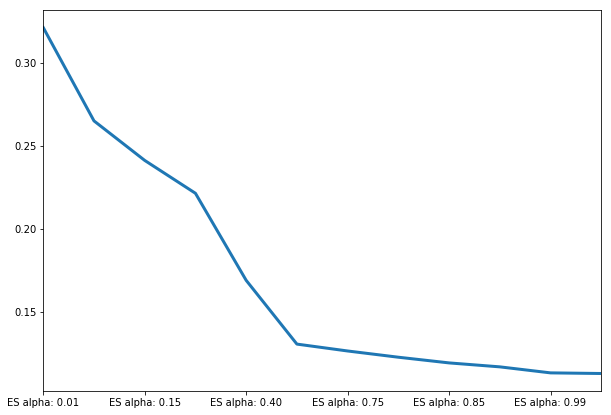

In [129]:
QualityStr[sorted(QualityStr.columns)].mean().plot(figsize = (10,7), linewidth=3.0)

* Optimal value of $\alpha$ is about $1.0$ 

In [131]:
QualityStr.iloc[:,np.argmin(QualityStr.values)]

Real wage    0.112668
Name: ES alpha: 1.00, dtype: float64

In [132]:
best_alpha_years = 1.0

/home/mariam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


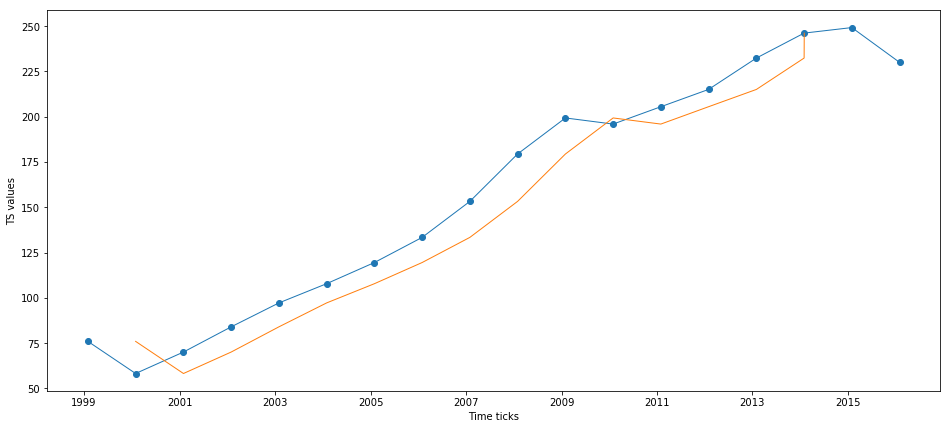

In [133]:
plt.figure(figsize=(16,7))
plt.plot(new_ts_years.ix['1998-09-01':'2017-01-01'], linewidth=1.0, marker='o')
plt.plot(frc_ts.ix['1998-09-01':'2017-01-01'], linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

In [134]:
h = 1
new_ts_years = ts.groupby(pd.TimeGrouper("12M")).mean()
alpha = best_alpha_years
new_ts = new_ts_years.ix['2016-01-01': '2017-01-31']
start = new_ts.index[-1]+timedelta(1)
end = new_ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
FRC_TS = dict()
frc_ts = pd.DataFrame(index = new_ts.index.append(rng), columns = new_ts.columns)

for cntr in new_ts.columns:
    frc_ts[cntr] = ExponentialSmoothing(new_ts[cntr], h, {'alpha':alpha, 'AdaptationPeriod': 10})

FRC_TS['ES alpha for years: %.2f' % alpha] = frc_ts
    
QualityStr = pd.DataFrame(index = new_ts.columns, columns = sorted(FRC_TS.keys()))
Accuracies_years = pd.DataFrame(index = new_ts.columns, columns = sorted(FRC_TS.keys()))
# ix = range(len(new_ts_years.index))
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(new_ts, frc_ts)
    Accuracies_years[param_cntr] = 1 - qualityMAPE(new_ts, frc_ts)[0]

In [135]:
Accuracies_years

,ES alpha for years: 1.00
Real wage,0.986031


In [136]:
QualityStr

,ES alpha for years: 1.00
Real wage,0.013969


<h1 align="center">3. Winters model for Additive Seasonality (25%) </h1>
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of SES: is it better? 
* \*5) Conclude whether Winter's ES can be used for this TS?

In [18]:
# Start with this code

###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T+h) ## put forecast of the model here
    
    l = np.NaN        # initialize ts level 
    s = []  # initalize seasonality values (it must be vector of lenth p)
#     print(len(x))
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[0] # initialize 

            if  len(s) == 0: # math.isnan(s[cntr % p]):
                for i in range(p):
                    s.append(x[i]) # initialize 
            
            if cntr >= p:
                s.append(gamma*(x[cntr] - l) + (1-gamma)*s[cntr - p]) # recurrent smoothing of seasonality
                l = alpha*(x[cntr] - s[cntr - p]) + (1-alpha)*l
            if cntr < p:
                l = alpha*(x[cntr] - s[cntr]) + (1-alpha)*l # recurrent smoothing of level 
            
        FORECAST[cntr+h] = l + s[cntr - p + h%p]
    return FORECAST

In [111]:
h = 1
alpha = 0.4
gamma = 0.3
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

w_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
#     Quality = [np.NaN]*len(ts)
for cntr in ts.columns:
    w_frc_ts[cntr] = WintersExponentialSmoothing(ts[cntr], h, {'alpha':alpha, 'gamma': gamma,
                                                               'seasonality_period': 12})

In [112]:
W_FRC_TS = dict()
W_FRC_TS['ES alpha: %.2f' % alpha, 'ES gamma: %.2f' % gamma] = w_frc_ts
    
Quality = pd.DataFrame(index = ts.columns, columns = sorted(W_FRC_TS.keys()))
for param_cntr in sorted(Quality.columns):
    w_frc_ts = W_FRC_TS[param_cntr]
    Quality[param_cntr],_ = qualityMAPE(ts, w_frc_ts)

/home/mariam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


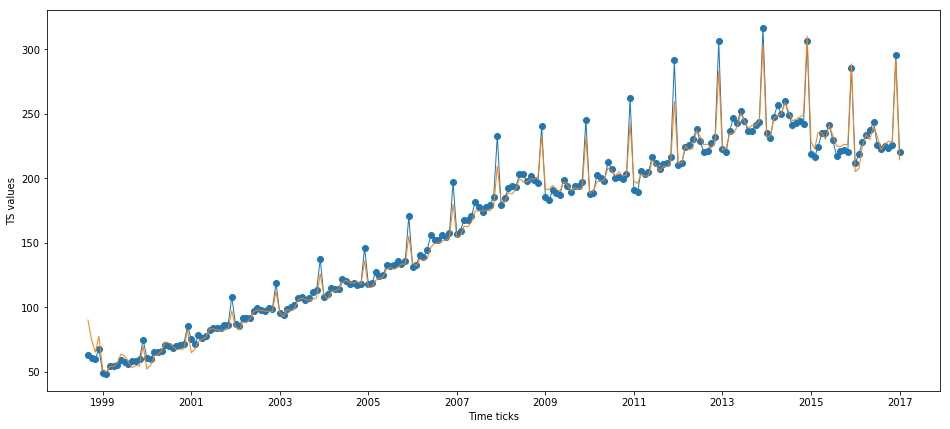

In [113]:
plt.figure(figsize=(16,7))
plt.plot(ts.ix['1998-09-01':'2017-01-01'], linewidth=1.0, marker='o')
plt.plot(w_frc_ts.ix['1998-09-01':'2017-01-01'], linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

In [114]:
ALPHA = [1.0, 0.99, 0.9, 0.85, 0.8, 0.75, 0.7, 0.4, 0.2, .15, 0.1, 0.01]
GAMMA = [1.0, 0.99, 0.9, 0.85, 0.8, 0.75, 0.7, 0.4, 0.2, .15, 0.1, 0.01]
h = 1
new_ts = ts.ix['1998-09-01':'2017-01-01']
start = new_ts.index[-1]+timedelta(1)
end = new_ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
W_FRC_TS = dict()
for alpha in ALPHA:
    for gamma in GAMMA:
        w_frc_ts = pd.DataFrame(index = new_ts.index.append(rng), columns = new_ts.columns)
        
        for cntr in new_ts.columns:
            w_frc_ts[cntr] = WintersExponentialSmoothing(new_ts[cntr], h, {'alpha':alpha, 'gamma':gamma,
                                                                           'seasonality_period': 12})
        
        W_FRC_TS['ES alpha: %.2f' % alpha, 'ES gamma: %.2f' % gamma] = w_frc_ts
    
Quality = pd.DataFrame(index = new_ts.columns, columns = sorted(W_FRC_TS.keys()))

for param_cntr in sorted(Quality.columns):
    w_frc_ts = W_FRC_TS[param_cntr]
    Quality[param_cntr],_ = qualityMAPE(new_ts, w_frc_ts)

In [115]:
Quality

,"(ES alpha: 0.01, ES gamma: 0.01)","(ES alpha: 0.01, ES gamma: 0.10)","(ES alpha: 0.01, ES gamma: 0.15)","(ES alpha: 0.01, ES gamma: 0.20)","(ES alpha: 0.01, ES gamma: 0.40)","(ES alpha: 0.01, ES gamma: 0.70)","(ES alpha: 0.01, ES gamma: 0.75)","(ES alpha: 0.01, ES gamma: 0.80)","(ES alpha: 0.01, ES gamma: 0.85)","(ES alpha: 0.01, ES gamma: 0.90)",...,"(ES alpha: 1.00, ES gamma: 0.15)","(ES alpha: 1.00, ES gamma: 0.20)","(ES alpha: 1.00, ES gamma: 0.40)","(ES alpha: 1.00, ES gamma: 0.70)","(ES alpha: 1.00, ES gamma: 0.75)","(ES alpha: 1.00, ES gamma: 0.80)","(ES alpha: 1.00, ES gamma: 0.85)","(ES alpha: 1.00, ES gamma: 0.90)","(ES alpha: 1.00, ES gamma: 0.99)","(ES alpha: 1.00, ES gamma: 1.00)"
Real wage,0.312238,0.268263,0.24975,0.234873,0.200213,0.169721,0.1682,0.167263,0.166441,0.165789,...,0.026513,0.023956,0.019688,0.020408,0.021253,0.022528,0.024402,0.027333,0.042636,0.046259


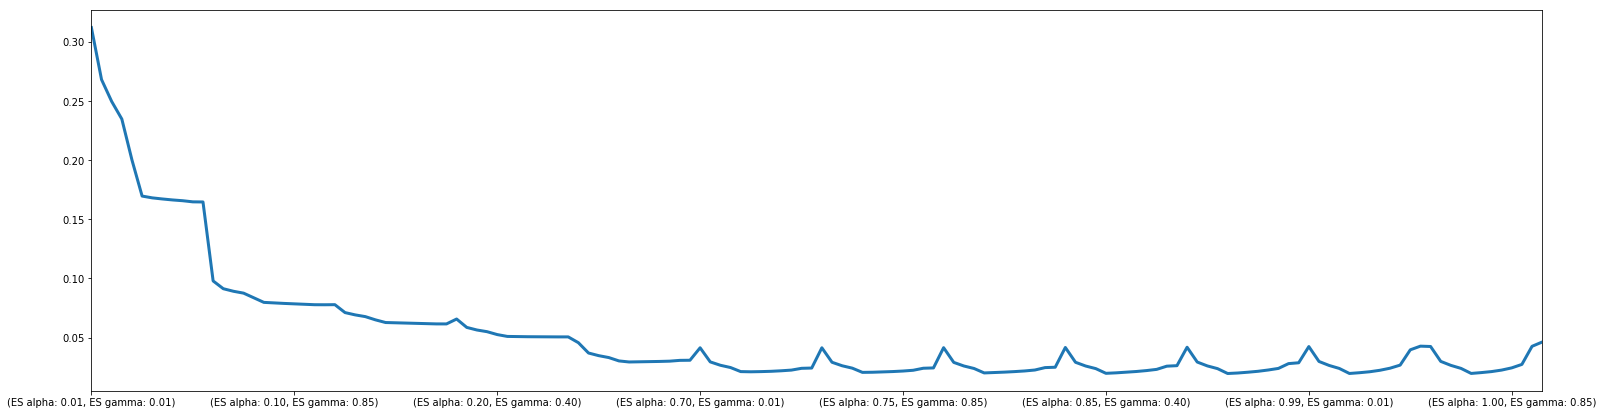

In [116]:
Quality[sorted(Quality.columns)].mean().plot(figsize = (26,7), linewidth=3.0)

In [117]:
Quality.iloc[:,np.argmin(Quality.values)]

Real wage    0.019638
Name: (ES alpha: 0.90, ES gamma: 0.40), dtype: float64

So our best alpha is 0.90 and best gamma is 0.4.

In [118]:
best_alpha = 0.90
best_gamma = 0.4

In [119]:
h = 1
alpha = best_alpha
gamma = best_gamma
new_ts = ts.ix['2016-02-01': '2017-01-31']
start = new_ts.index[-1]+timedelta(1)
end = new_ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
W_FRC_TS = dict()
w_frc_ts = pd.DataFrame(index = new_ts.index.append(rng), columns = new_ts.columns)

for cntr in new_ts.columns:
    w_frc_ts[cntr] = WintersExponentialSmoothing(new_ts[cntr], h, {'alpha':alpha,'gamma':gamma,
                                                                  'seasonality_period': 12})

W_FRC_TS['ES alpha: %.2f' % alpha, 'ES gamma: %.2f' % gamma] = w_frc_ts
    
Quality = pd.DataFrame(index = new_ts.columns, columns = sorted(W_FRC_TS.keys()))

for param_cntr in sorted(Quality.columns):
    w_frc_ts = W_FRC_TS[param_cntr]
    Quality[param_cntr],_ = qualityMAPE(new_ts, w_frc_ts)
    Accuracy = 1 - qualityMAPE(new_ts, w_frc_ts)[0]

In [120]:
Accuracy.values[0]

0.99033879988347961

<h2 align="left">4. Theil-Wage model for TS with linear trend and seasonality (25%)</h2>
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [29]:

###################### Theil-Wage Model #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def TheilWageModel(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    betta = Params['betta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T+h) ## put forecast of the model here
    
    l = np.NaN        # initialize ts level 
    b = np.NaN
    s = []  # initalize seasonality values (it must be vector of lenth p)
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(b):
                b = 0
            if math.isnan(l):
                l = x[0] # initialize 

            if  len(s) == 0: # math.isnan(s[cntr % p]):
                for i in range(p):
                    s.append(x[i]) # initialize 
                    
            if cntr >= p:
                l_prev = l
                s.append(gamma*(x[cntr] - l) + (1-gamma)*s[cntr - p]) # recurrent smoothing of seasonality
                l = alpha*(x[cntr] - s[cntr - p]) + (1-alpha)*(l + b)
                b = betta * (l - l_prev) + (1 - betta) * b
            elif cntr < p:
                l_prev = l
                l = alpha*(x[cntr] - s[cntr]) + (1-alpha)*(l+b) # recurrent smoothing of level 
                b = betta * (l - l_prev) + (1 - betta) * b
                                           
        FORECAST[cntr+h] = l + b*h + s[cntr - p + h%p]
    return FORECAST

In [99]:
h = 1
alpha = 0.4
gamma = 0.3
betta = 0.2
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

th_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

for cntr in ts.columns:
    th_frc_ts[cntr] = TheilWageModel(ts[cntr], h, {'alpha':alpha, 'gamma': gamma, 'betta': betta,
                                                               'seasonality_period': 12})

In [100]:
TH_FRC_TS = dict()
TH_FRC_TS['ES alpha: %.2f' % alpha, 'ES gamma: %.2f' % gamma] = th_frc_ts
    
Quality = pd.DataFrame(index = ts.columns, columns = sorted(TH_FRC_TS.keys()))
for param_cntr in sorted(Quality.columns):
    th_frc_ts = TH_FRC_TS[param_cntr]
    Quality[param_cntr],_ = qualityMAPE(ts, th_frc_ts)

/home/mariam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


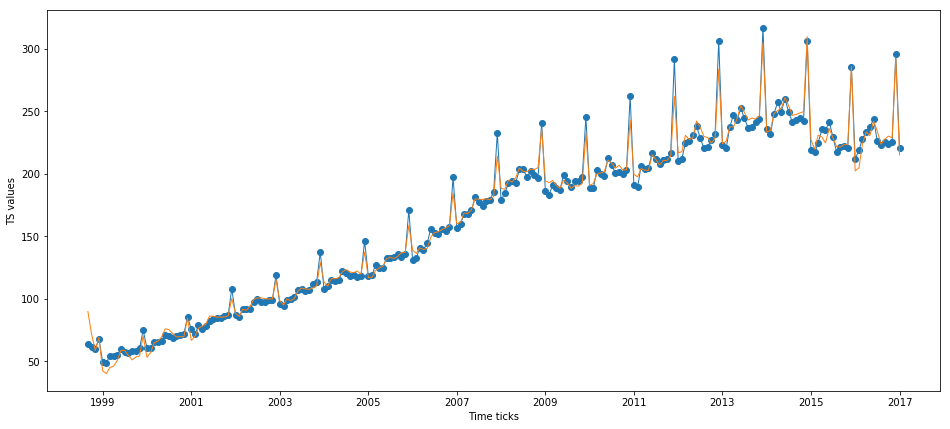

In [101]:
plt.figure(figsize=(16,7))
plt.plot(ts.ix['1998-09-01':'2017-01-01'], linewidth=1.0, marker='o')
plt.plot(th_frc_ts.ix['1998-09-01':'2017-01-01'], linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

In [102]:
ALPHA = [1.0, 0.99, 0.9, 0.85, 0.8, 0.75, 0.7, 0.4, 0.2, .15, 0.1, 0.01]
GAMMA = [1.0, 0.99, 0.9, 0.85, 0.8, 0.75, 0.7, 0.4, 0.2, .15, 0.1, 0.01]
BETTA = [1.0, 0.99, 0.9, 0.85, 0.8, 0.75, 0.7, 0.4, 0.2, .15, 0.1, 0.01, 0.0]
h = 1
new_ts = ts.ix['1998-09-01':'2017-01-01']
start = new_ts.index[-1]+timedelta(1)
end = new_ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
TH_FRC_TS = dict()
for alpha in ALPHA:
    for gamma in GAMMA:
        for betta in BETTA:
            th_frc_ts = pd.DataFrame(index = new_ts.index.append(rng), columns = new_ts.columns)

            for cntr in new_ts.columns:
                th_frc_ts[cntr] = TheilWageModel(new_ts[cntr], h, {'alpha':alpha, 'gamma':gamma,
                                                                   'betta': betta, 'seasonality_period': 12})

            TH_FRC_TS['%.2f' % alpha, '%.2f' % gamma, '%.2f' % betta] = th_frc_ts
    
Quality = pd.DataFrame(index = new_ts.columns, columns = sorted(TH_FRC_TS.keys()))

for param_cntr in sorted(Quality.columns):
    th_frc_ts = TH_FRC_TS[param_cntr]
    Quality[param_cntr],_ = qualityMAPE(new_ts, th_frc_ts)

In [103]:
Quality

,"(0.01, 0.01, 0.00)","(0.01, 0.01, 0.01)","(0.01, 0.01, 0.10)","(0.01, 0.01, 0.15)","(0.01, 0.01, 0.20)","(0.01, 0.01, 0.40)","(0.01, 0.01, 0.70)","(0.01, 0.01, 0.75)","(0.01, 0.01, 0.80)","(0.01, 0.01, 0.85)",...,"(1.00, 1.00, 0.15)","(1.00, 1.00, 0.20)","(1.00, 1.00, 0.40)","(1.00, 1.00, 0.70)","(1.00, 1.00, 0.75)","(1.00, 1.00, 0.80)","(1.00, 1.00, 0.85)","(1.00, 1.00, 0.90)","(1.00, 1.00, 0.99)","(1.00, 1.00, 1.00)"
Real wage,0.312238,0.303223,0.306836,0.279672,0.254316,0.227649,0.290129,0.299317,0.302604,0.303665,...,0.053715,0.055411,0.061274,0.07236,0.07471,0.077236,0.07996,0.082904,0.089031,0.08978


In [104]:
np.argmin(Quality.values)
Quality.iloc[:, 402:422]

,"(0.15, 0.75, 1.00)","(0.15, 0.80, 0.00)","(0.15, 0.80, 0.01)","(0.15, 0.80, 0.10)","(0.15, 0.80, 0.15)","(0.15, 0.80, 0.20)","(0.15, 0.80, 0.40)","(0.15, 0.80, 0.70)","(0.15, 0.80, 0.75)","(0.15, 0.80, 0.80)","(0.15, 0.80, 0.85)","(0.15, 0.80, 0.90)","(0.15, 0.80, 0.99)","(0.15, 0.80, 1.00)","(0.15, 0.85, 0.00)","(0.15, 0.85, 0.01)","(0.15, 0.85, 0.10)","(0.15, 0.85, 0.15)","(0.15, 0.85, 0.20)","(0.15, 0.85, 0.40)"
Real wage,0.910648,0.062277,0.06383,0.056425,0.058146,0.062408,0.082322,0.369061,0.509656,0.685409,0.877348,1.019774,1.47298,1.531607,0.062063,0.063701,0.056551,0.059095,0.063705,0.088524


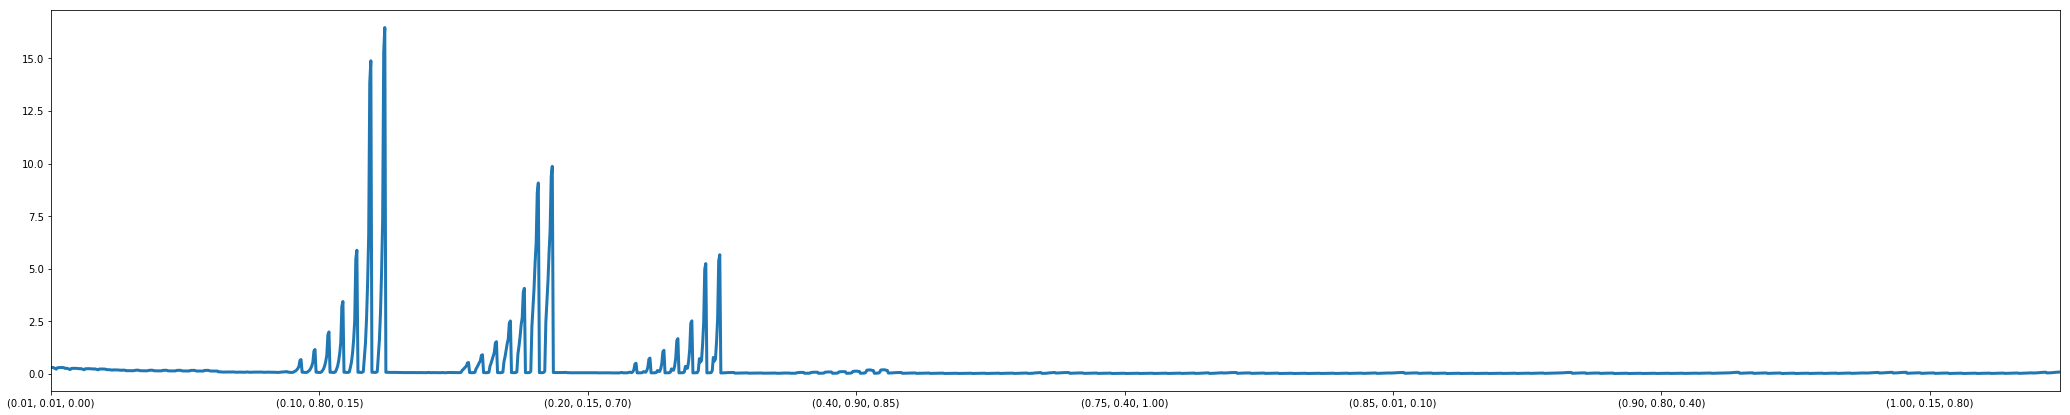

In [105]:
Quality[sorted(Quality.columns)].mean().plot(figsize = (36,7), linewidth=3.0)

In [106]:
Quality.iloc[:,np.argmin(Quality.values[Quality.values > 0])]

Real wage    0.019638
Name: (0.90, 0.40, 0.00), dtype: float64

In [107]:
best_alpha = 0.9
best_gamma = 0.40
best_betta = 0.0

In [108]:
h = 1
alpha = best_alpha
gamma = best_gamma
betta = best_betta
new_ts = ts.ix['2016-02-01': '2017-01-31']
start = new_ts.index[-1]+timedelta(1)
end = new_ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
TH_FRC_TS = dict()
th_frc_ts = pd.DataFrame(index = new_ts.index.append(rng), columns = new_ts.columns)

for cntr in new_ts.columns:
    th_frc_ts[cntr] = TheilWageModel(new_ts[cntr], h, {'alpha':alpha, 'gamma':gamma,
                                                       'betta': betta, 'seasonality_period': 12})

TH_FRC_TS['ES alpha: %.2f' % alpha, 'ES gamma: %.2f' % gamma, 'ES betta: %.2f' % betta] = th_frc_ts
    
Quality = pd.DataFrame(index = new_ts.columns, columns = sorted(TH_FRC_TS.keys()))

for param_cntr in sorted(Quality.columns):
    th_frc_ts = TH_FRC_TS[param_cntr]
    Quality[param_cntr],_ = qualityMAPE(new_ts, th_frc_ts)
    Accuracy = 1 - qualityMAPE(new_ts, th_frc_ts)[0]

In [109]:
Accuracy.values[0]

0.99033879988347961

In [110]:
Quality

,"(ES alpha: 0.90, ES gamma: 0.40, ES betta: 0.00)"
Real wage,0.009661


<h2 align="left"> 5. Non-additive model of ES (25%)</h2>
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it expetrly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diver

In [52]:
def WintersMult(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    betta = Params['betta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T+h) ## put forecast of the model here
    
    l = np.NaN        # initialize ts level 
    b = np.NaN
    s = []  # initalize seasonality values (it must be vector of lenth p)
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(b):
                b = 0
            if math.isnan(l):
                l = x[0] # initialize 

            if  len(s) == 0: # math.isnan(s[cntr % p]):
                for i in range(p):
                    s.append(x[i]/x[i-1]) # initialize 
                    
            if cntr >= p:
                l_prev = l
                s.append(gamma*(x[cntr] / l) + (1-gamma)*s[cntr - p]) # recurrent smoothing of seasonality
                l = alpha*(x[cntr] - s[cntr - p]) + (1-alpha)*(l + b)
                b = betta * (l - l_prev) + (1 - betta) * b
            elif cntr < p:
                l_prev = l
                l = alpha*(x[cntr] / s[cntr]) + (1-alpha)*(l+b) # recurrent smoothing of level 
                b = betta * (l - l_prev) + (1 - betta) * b
                                           
        FORECAST[cntr+h] = (l + b*h) * s[cntr - p + h%p]
    return FORECAST

In [85]:
h = 1
alpha = 0.4
gamma = 0.3
betta = 0.2
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

wm_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

for cntr in ts.columns:
    wm_frc_ts[cntr] = WintersMult(ts[cntr], h, {'alpha':alpha, 'gamma': gamma, 'betta': betta,
                                                               'seasonality_period': 12})

In [86]:
WM_FRC_TS = dict()
WM_FRC_TS['ES alpha: %.2f' % alpha,'ES betta: %.2f' % betta, 'ES gamma: %.2f' % gamma] = wm_frc_ts
    
Quality_WM = pd.DataFrame(index = ts.columns, columns = sorted(WM_FRC_TS.keys()))
for param_cntr in sorted(Quality_WM.columns):
    wm_frc_ts = WM_FRC_TS[param_cntr]
    Quality_WM[param_cntr],_ = qualityMAPE(ts, wm_frc_ts)

/home/mariam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


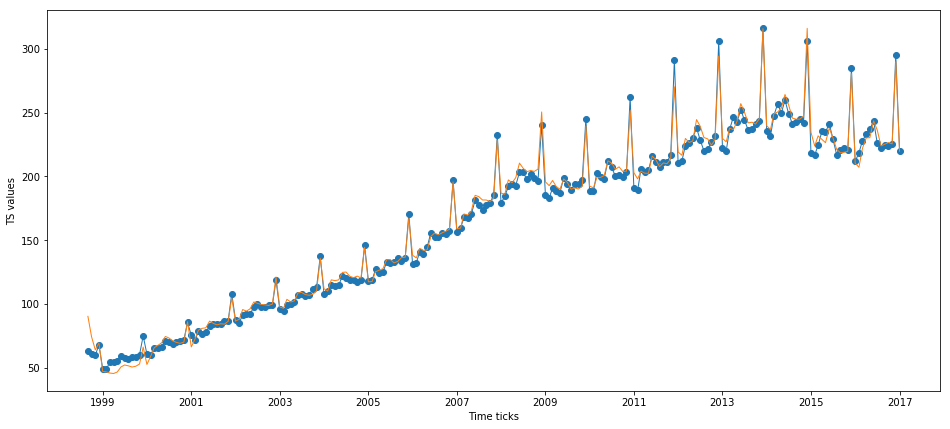

In [87]:
plt.figure(figsize=(16,7))
plt.plot(ts.ix['1998-09-01':'2017-01-01'], linewidth=1.0, marker='o')
plt.plot(wm_frc_ts.ix['1998-09-01':'2017-01-01'], linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

In [88]:
ALPHA = [1.0, 0.99, 0.9, 0.85, 0.8, 0.75, 0.7, 0.4, 0.2, .15, 0.1, 0.01]
GAMMA = [1.0, 0.99, 0.9, 0.85, 0.8, 0.75, 0.7, 0.4, 0.2, .15, 0.1, 0.01]
BETTA = [1.0, 0.99, 0.9, 0.85, 0.8, 0.75, 0.7, 0.4, 0.2, .15, 0.1, 0.01, 0.0]
h = 1
new_ts = ts.ix['1998-09-01':'2017-01-01']
start = new_ts.index[-1]+timedelta(1)
end = new_ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
WM_FRC_TS = dict()
for alpha in ALPHA:
    for gamma in GAMMA:
        for betta in BETTA:
            wm_frc_ts = pd.DataFrame(index = new_ts.index.append(rng), columns = new_ts.columns)

            for cntr in new_ts.columns:
                wm_frc_ts[cntr] = WintersMult(new_ts[cntr], h, {'alpha':alpha, 'gamma':gamma,
                                                                'betta': betta, 'seasonality_period': 12})

            WM_FRC_TS['%.2f' % alpha, '%.2f' % betta, '%.2f' % gamma] = wm_frc_ts
    
Quality_WM = pd.DataFrame(index = new_ts.columns, columns = sorted(WM_FRC_TS.keys()))

for param_cntr in sorted(Quality_WM.columns):
    wm_frc_ts = WM_FRC_TS[param_cntr]
    Quality_WM[param_cntr],_ = qualityMAPE(new_ts, wm_frc_ts)

In [89]:
Quality_WM

,"(0.01, 0.00, 0.01)","(0.01, 0.00, 0.10)","(0.01, 0.00, 0.15)","(0.01, 0.00, 0.20)","(0.01, 0.00, 0.40)","(0.01, 0.00, 0.70)","(0.01, 0.00, 0.75)","(0.01, 0.00, 0.80)","(0.01, 0.00, 0.85)","(0.01, 0.00, 0.90)",...,"(1.00, 1.00, 0.15)","(1.00, 1.00, 0.20)","(1.00, 1.00, 0.40)","(1.00, 1.00, 0.70)","(1.00, 1.00, 0.75)","(1.00, 1.00, 0.80)","(1.00, 1.00, 0.85)","(1.00, 1.00, 0.90)","(1.00, 1.00, 0.99)","(1.00, 1.00, 1.00)"
Real wage,0.334925,0.20185,0.171394,0.153298,0.11981,0.088229,0.084587,0.081255,0.078279,0.075522,...,0.123635,0.118961,0.110896,0.107868,0.107603,0.107396,0.107273,0.107204,0.107049,0.10703


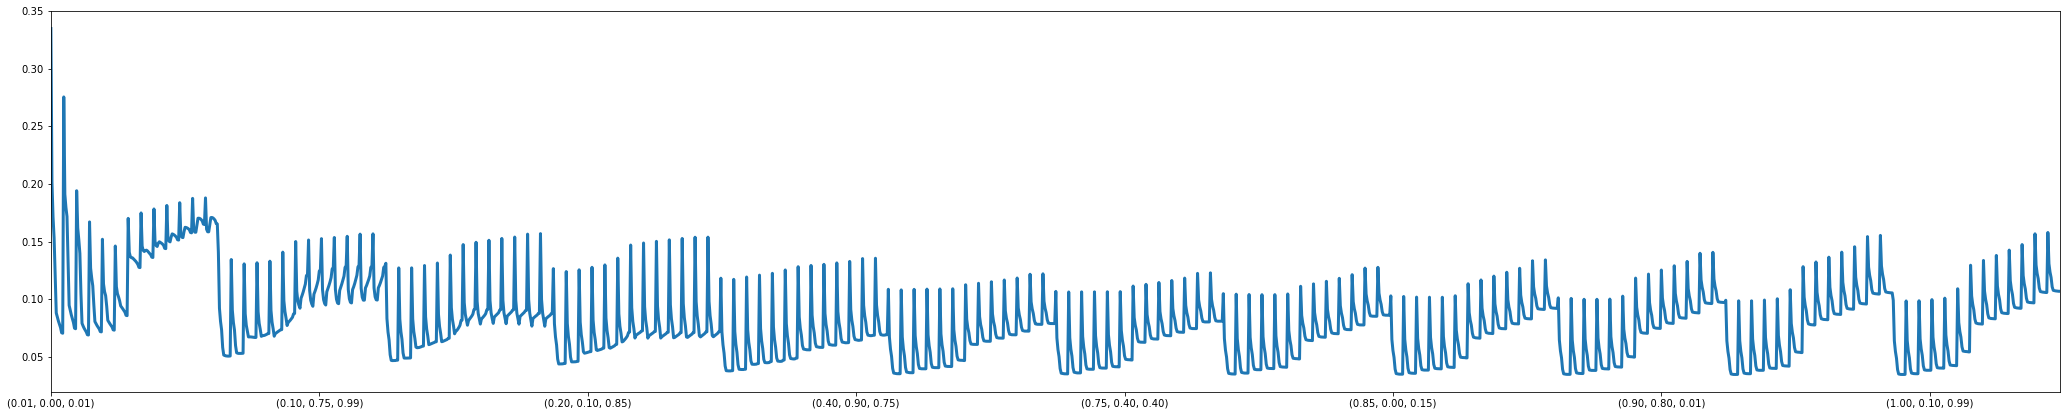

In [90]:
Quality_WM[sorted(Quality_WM.columns)].mean().plot(figsize = (36,7), linewidth=3.0)

In [91]:
Quality_WM.iloc[:,np.argmin(Quality_WM.values)]

Real wage    0.034845
Name: (1.00, 0.00, 0.85), dtype: float64

In [140]:
best_alpha = 1.00
best_gamma = 0.85
best_betta = 0.00

In [141]:
h = 1
alpha = best_alpha
gamma = best_gamma
betta = best_betta
new_ts = ts.ix['2016-02-01': '2017-01-31']
start = new_ts.index[-1]+timedelta(1)
end = new_ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
WM_FRC_TS = dict()
wm_frc_ts = pd.DataFrame(index = new_ts.index.append(rng), columns = new_ts.columns)

for cntr in new_ts.columns:
    wm_frc_ts[cntr] = WintersMult(new_ts[cntr], h, {'alpha':alpha, 'gamma':gamma,
                                                       'betta': betta, 'seasonality_period': 12})

WM_FRC_TS['ES alpha: %.2f' % alpha, 'ES betta: %.2f' % betta, 'ES gamma: %.2f' % gamma] = wm_frc_ts
    
Quality_WM = pd.DataFrame(index = new_ts.columns, columns = sorted(WM_FRC_TS.keys()))

for param_cntr in sorted(Quality_WM.columns):
    wm_frc_ts = WM_FRC_TS[param_cntr]
    Quality_WM[param_cntr],_ = qualityMAPE(new_ts, wm_frc_ts)
    Accuracy = 1 - qualityMAPE(new_ts, wm_frc_ts)[0]

In [142]:
Accuracy.values[0]

0.95749106270105588

## Summing up

Accuracies:
SES _ 0.942238
Winter's ESM+A _ 0.9903387
Thail-Wage ESM+A+T _ 0.9903387
Holt-Winters ESM+M+T _ 0.957491

1) The best accuracy gives Holt-Winters multiplicative model. 

2) Accuracies of Winter's ESM+A and Thail-Wage ESM+A+T are the same, so there-s no need to use Thail-Wage ESM+A+T as we don't need the trend.